### Description: 
In this Notebook, I will load finetuned weight and necessary libraries. and perfom prediction....

In [1]:
pip install super-gradients

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from super_gradients.training import models
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

[2023-11-25 12:36:00] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-25 12:36:01] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [2]:
pip install torchinfo


Note: you may need to restart the kernel to use updated packages.


In [10]:
from torchinfo import summary

summary(model=yolo_nas_l, 
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

In [27]:
url = "C:/Users/Admin/github/AI_project/data/test/test_img/1.jpg"
#url = "C:/Users/Admin/github/AI_project/test_video_input/test4.mp4"
#pred_img = yolo_nas_l.predict(url, conf=0.35).show()
pred_img = yolo_nas_l.predict(url, conf=0.35)

c:\Users\Admin\anaconda3\envs\mix_env\lib\site-packages\numpy\lib\arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
c:\Users\Admin\anaconda3\envs\mix_env\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2023-11-25 13:15:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


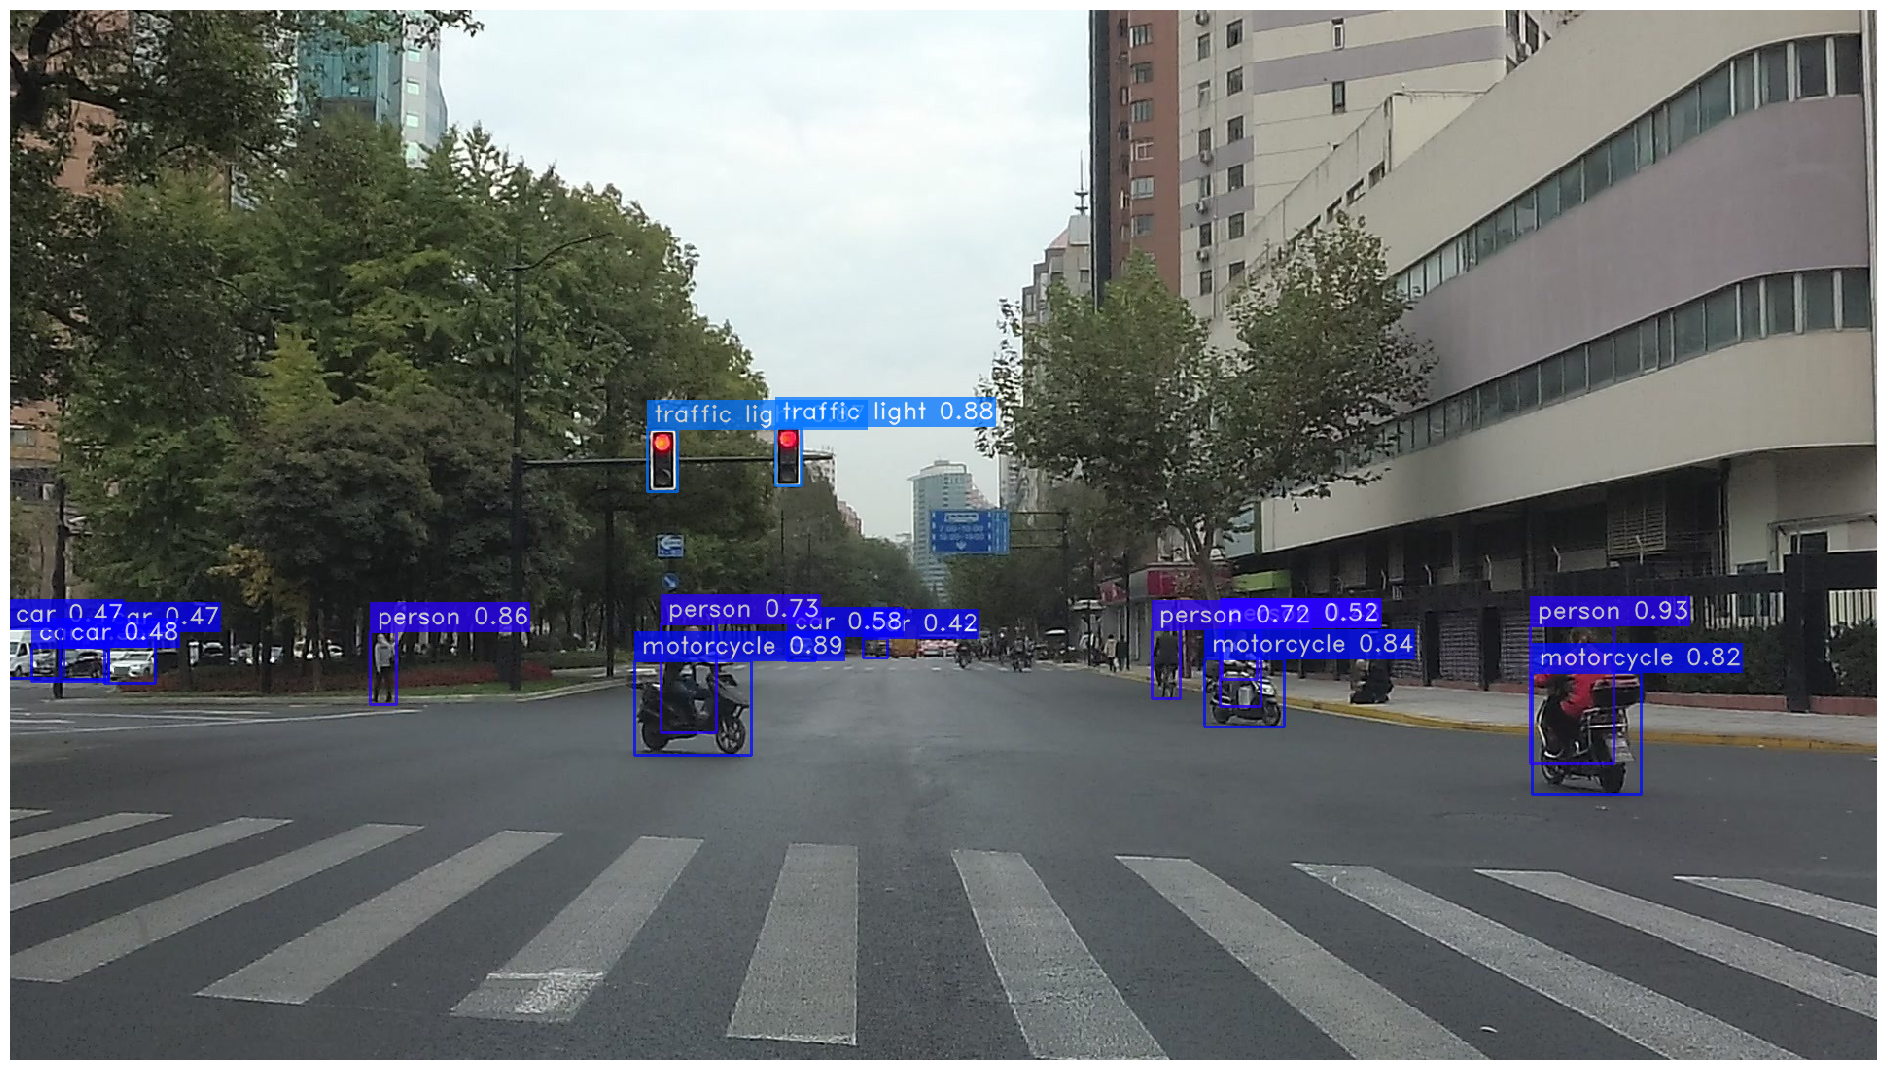

In [28]:
pred_img.show()

In [29]:
images_predictions = yolo_nas_l.predict(url, conf=0.35)

[2023-11-25 13:17:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [30]:
for image_prediction in images_predictions:
    class_names = image_prediction.class_names
    labels = image_prediction.prediction.labels
    confidence = image_prediction.prediction.confidence
    bboxes = image_prediction.prediction.bboxes_xyxy

    for i, (label, conf, bbox) in enumerate(zip(labels, confidence, bboxes)):
        print("prediction: ", i)
        print("label_id: ", label)
        print("label_name: ", class_names[int(label)])
        print("confidence: ", conf)
        print("bbox: ", bbox)
        print("--" * 10)


prediction:  0
label_id:  0.0
label_name:  person
confidence:  0.9254646
bbox:  [1563.3358   633.94434 1649.5638   775.61237]
--------------------
prediction:  1
label_id:  3.0
label_name:  motorcycle
confidence:  0.89373904
bbox:  [642.74097 669.75165 762.6826  766.7654 ]
--------------------
prediction:  2
label_id:  9.0
label_name:  traffic light
confidence:  0.8830795
bbox:  [787.4057  428.5912  813.1969  489.12305]
--------------------
prediction:  3
label_id:  9.0
label_name:  traffic light
confidence:  0.87323016
bbox:  [655.58386 431.09384 686.4043  495.19376]
--------------------
prediction:  4
label_id:  0.0
label_name:  person
confidence:  0.8584675
bbox:  [370.64545 639.4913  397.86365 714.4652 ]
--------------------
prediction:  5
label_id:  3.0
label_name:  motorcycle
confidence:  0.84119606
bbox:  [1228.7606   667.1407  1310.0791   737.27264]
--------------------
prediction:  6
label_id:  3.0
label_name:  motorcycle
confidence:  0.8153186
bbox:  [1565.7728   681.0926  16

In [32]:
########## vedio


url = "C:/Users/Admin/github/AI_project/test_video_input/test_2_small.mp4"
pred_ved= yolo_nas_l.predict(url, conf=0.35)

Predicting Video:  79%|███████▊  | 225/286 [04:41<01:07,  1.11s/it]

Predicting Video: 100%|██████████| 286/286 [05:13<00:00,  1.10s/it]


In [35]:
pred_ved.show()

In [37]:
for frame_index, frame_prediction in enumerate(pred_ved):
    labels = frame_prediction.prediction.labels
    confidence = frame_prediction.prediction.confidence
    bboxes = frame_prediction.prediction.bboxes_xyxy

    # You can do any frame-specific operations
    # ...

    # Example: Save individual frames with detected objects
    frame_name = f"test_video_output/frame_{frame_index}.jpg"
    frame_prediction.save(frame_name) # save frame as an image


super_gradients.training.utils.predict.prediction_results.VideoDetectionPrediction

In [58]:
### Deep Sort on Yolo Nas
import hydra
import torch
import argparse
import time
from pathlib import Path

import cv2
from deep_sort_pytorch.utils.parser import get_config
from deep_sort_pytorch.deep_sort import DeepSort
from collections import deque
import numpy as np

palette = (2 ** 11 - 1, 2 ** 15 - 1, 2 ** 20 - 1)
data_deque = {}

deepsort = None

def init_tracker():
    global deepsort
    cfg_deep = get_config()
    cfg_deep.merge_from_file("deep_sort_pytorch/configs/deep_sort.yaml")

    deepsort= DeepSort(cfg_deep.DEEPSORT.REID_CKPT,
                            max_dist=cfg_deep.DEEPSORT.MAX_DIST, min_confidence=cfg_deep.DEEPSORT.MIN_CONFIDENCE,
                            nms_max_overlap=cfg_deep.DEEPSORT.NMS_MAX_OVERLAP, max_iou_distance=cfg_deep.DEEPSORT.MAX_IOU_DISTANCE,
                            max_age=cfg_deep.DEEPSORT.MAX_AGE, n_init=cfg_deep.DEEPSORT.N_INIT, nn_budget=cfg_deep.DEEPSORT.NN_BUDGET,
                            use_cuda=True)
##########################################################################################
def xyxy_to_xywh(*xyxy):
    """ Calculates the relative bounding box from absolute pixel values. """
    bbox_left = min(xyxy[0], xyxy[2])
    bbox_top = min(xyxy[1], xyxy[3])
    bbox_w = abs(xyxy[0] - xyxy[2])
    bbox_h = abs(xyxy[1] - xyxy[3])
    x_c = (bbox_left + bbox_w / 2)
    y_c = (bbox_top + bbox_h / 2)
    w = bbox_w
    h = bbox_h
    return x_c, y_c, w, h


def xyxy_to_tlwh(bbox_xyxy):
    tlwh_bboxs = []
    for i, box in enumerate(bbox_xyxy):
        x1, y1, x2, y2 = [int(i) for i in box]
        top = x1
        left = y1
        w = int(x2 - x1)
        h = int(y2 - y1)
        tlwh_obj = [top, left, w, h]
        tlwh_bboxs.append(tlwh_obj)
    return tlwh_bboxs

def compute_color_for_labels(label):
    """
    Simple function that adds fixed color depending on the class
    """
    if label == 0: #person
        color = (85,45,255)
    elif label == 2: # Car
        color = (222,82,175)
    elif label == 3:  # Motobike
        color = (0, 204, 255)
    elif label == 5:  # Bus
        color = (0, 149, 255)
    else:
        color = [int((p * (label ** 2 - label + 1)) % 255) for p in palette]
    return tuple(color)

def draw_border(img, pt1, pt2, color, thickness, r, d):
    x1,y1 = pt1
    x2,y2 = pt2
    # Top left
    cv2.line(img, (x1 + r, y1), (x1 + r + d, y1), color, thickness)
    cv2.line(img, (x1, y1 + r), (x1, y1 + r + d), color, thickness)
    cv2.ellipse(img, (x1 + r, y1 + r), (r, r), 180, 0, 90, color, thickness)
    # Top right
    cv2.line(img, (x2 - r, y1), (x2 - r - d, y1), color, thickness)
    cv2.line(img, (x2, y1 + r), (x2, y1 + r + d), color, thickness)
    cv2.ellipse(img, (x2 - r, y1 + r), (r, r), 270, 0, 90, color, thickness)
    # Bottom left
    cv2.line(img, (x1 + r, y2), (x1 + r + d, y2), color, thickness)
    cv2.line(img, (x1, y2 - r), (x1, y2 - r - d), color, thickness)
    cv2.ellipse(img, (x1 + r, y2 - r), (r, r), 90, 0, 90, color, thickness)
    # Bottom right
    cv2.line(img, (x2 - r, y2), (x2 - r - d, y2), color, thickness)
    cv2.line(img, (x2, y2 - r), (x2, y2 - r - d), color, thickness)
    cv2.ellipse(img, (x2 - r, y2 - r), (r, r), 0, 0, 90, color, thickness)

    cv2.rectangle(img, (x1 + r, y1), (x2 - r, y2), color, -1, cv2.LINE_AA)
    cv2.rectangle(img, (x1, y1 + r), (x2, y2 - r - d), color, -1, cv2.LINE_AA)
    
    cv2.circle(img, (x1 +r, y1+r), 2, color, 12)
    cv2.circle(img, (x2 -r, y1+r), 2, color, 12)
    cv2.circle(img, (x1 +r, y2-r), 2, color, 12)
    cv2.circle(img, (x2 -r, y2-r), 2, color, 12)
    
    return img

def UI_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]

        img = draw_border(img, (c1[0], c1[1] - t_size[1] -3), (c1[0] + t_size[0], c1[1]+3), color, 1, 8, 2)

        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)



def draw_boxes(img, bbox, names,object_id, identities=None, offset=(0, 0)):
    #cv2.line(img, line[0], line[1], (46,162,112), 3)

    height, width, _ = img.shape
    # remove tracked point from buffer if object is lost
    for key in list(data_deque):
      if key not in identities:
        data_deque.pop(key)

    for i, box in enumerate(bbox):
        x1, y1, x2, y2 = [int(i) for i in box]
        x1 += offset[0]
        x2 += offset[0]
        y1 += offset[1]
        y2 += offset[1]

        # code to find center of bottom edge
        center = (int((x2+x1)/ 2), int((y2+y2)/2))

        # get ID of object
        id = int(identities[i]) if identities is not None else 0

        # create new buffer for new object
        if id not in data_deque:  
          data_deque[id] = deque(maxlen= 64)
        color = compute_color_for_labels(object_id[i])
        obj_name = names[object_id[i]]
        label = '{}{:d}'.format("", id) + ":"+ '%s' % (obj_name)

        # add center to buffer
        data_deque[id].appendleft(center)
        UI_box(box, img, label=label, color=color, line_thickness=2)
        # draw trail
        for i in range(1, len(data_deque[id])):
            # check if on buffer value is none
            if data_deque[id][i - 1] is None or data_deque[id][i] is None:
                continue
            # generate dynamic thickness of trails
            thickness = int(np.sqrt(64 / float(i + i)) * 1.5)
            # draw trails
            cv2.line(img, data_deque[id][i - 1], data_deque[id][i], color, thickness)
    return img

In [59]:
### Vedio to yaml
import yaml

def save_video_predictions_to_yaml(pred_ved, output_file):
    video_data = {}

    for frame_index, frame_prediction in enumerate(pred_ved):
        frame_data = {}
        labels = frame_prediction.prediction.labels
        confidence = frame_prediction.prediction.confidence
        bboxes = frame_prediction.prediction.bboxes_xyxy
        class_names = frame_prediction.class_names

        for bbox_id, (label, conf, bbox) in enumerate(zip(labels, confidence, bboxes)):
            bbox_data = {
                "label_id": int(label),  # Convert numpy scalar to int
                "label_name": class_names[int(label)],
                "confidence": float(conf),  # Convert numpy scalar to float
                "bbox": [float(coord) for coord in bbox]  # Convert bbox coordinates to float
            }
            frame_data[f"bbox_{bbox_id}"] = bbox_data

        video_data[f"frame_{frame_index}"] = frame_data

    with open(output_file, 'w') as file:
        yaml.dump(video_data, file, sort_keys=False)



In [48]:
save_video_predictions_to_yaml(pred_ved, 'video_predictions.yaml')

In [60]:
def init_tracker():
    global deepsort
    cfg_deep = get_config()
    cfg_deep.merge_from_file("deep_sort_pytorch/configs/deep_sort.yaml")

    deepsort= DeepSort(cfg_deep.DEEPSORT.REID_CKPT,
                            max_dist=cfg_deep.DEEPSORT.MAX_DIST, min_confidence=cfg_deep.DEEPSORT.MIN_CONFIDENCE,
                            nms_max_overlap=cfg_deep.DEEPSORT.NMS_MAX_OVERLAP, max_iou_distance=cfg_deep.DEEPSORT.MAX_IOU_DISTANCE,
                            max_age=cfg_deep.DEEPSORT.MAX_AGE, n_init=cfg_deep.DEEPSORT.N_INIT, nn_budget=cfg_deep.DEEPSORT.NN_BUDGET,
                            use_cuda=True)

In [63]:
import yaml
import cv2
import numpy as np
from collections import deque
from deep_sort_pytorch.utils.parser import get_config
from deep_sort_pytorch.deep_sort import DeepSort
import numpy as np

palette = (2 ** 11 - 1, 2 ** 15 - 1, 2 ** 20 - 1)
data_deque = {}


# Assuming deepsort is an instance of the Deep SORT tracking class
# and is initialized elsewhere in your code

def deep_sort_tracking_from_yaml(input_video_path, yaml_file):
    # Load YAML file
    with open(yaml_file, 'r') as file:
        video_data = yaml.safe_load(file)

    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output.mp4', codec, fps, (width, height))

    frame_index = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_key = f'frame_{frame_index}'
        if frame_key in video_data:
            bbox_data = video_data[frame_key]
            xywh_bboxs, confs, oids = [], [], []
            for bbox_key, bbox_info in bbox_data.items():
                xywh = xyxy_to_xywh(*bbox_info['bbox'])
                xywh_bboxs.append(xywh)
                confs.append([bbox_info['confidence']])
                oids.append(bbox_info['label_id'])

            xywhs = np.array(xywh_bboxs)
            confss = np.array(confs)
            
            outputs = deepsort.update(xywhs, confss, oids, frame)
            if len(outputs) > 0:
                bbox_xyxy = outputs[:, :4]
                identities = outputs[:, -2]
                object_id = outputs[:, -1]
    
                draw_boxes(frame, bbox_xyxy, model_names, object_id, identities)

        out.write(frame)
        frame_index += 1

    cap.release()
    out.release()



In [64]:
# Usage example

# Initialize the tracker
init_tracker()

# Define model names based on your model's classes
model_names = ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light']

deep_sort_tracking_from_yaml("C:/Users/Admin/github/AI_project/test_video_input/test_2_small.mp4", 'video_predictions.yaml')

[2023-11-25 14:59:39] INFO - feature_extractor.py - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!


In [12]:
def count_cows(predicted_image):
  predictions = predicted_image  # replace this with actual output of your model
  number_of_boxes = 0
  for prediction in predictions:
    number_of_boxes += prediction.prediction.bboxes_xyxy.shape[0]

  return number_of_boxes


In [13]:
predicted_image = yolo_nas_l.predict(url, conf=0.35)
print('Total Cow predicted:',count_cows(predicted_image))

c:\Users\Admin\anaconda3\envs\mix_env\lib\site-packages\numpy\lib\arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
c:\Users\Admin\anaconda3\envs\mix_env\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2023-11-25 12:48:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Total Cow predicted: 17


In [15]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"


In [ ]:
### Finetuning Starts here ##

In [27]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run',
                  ckpt_root_dir=CHECKPOINT_DIR)


In [16]:
#!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="cF1Uo6xTLKOH21FeLvnt")
project = rf.workspace("vt-eyajq").project("cow_test-amlio")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cow_test-1 in yolov5pytorch:: 100%|██████████| 114/114 [00:00<00:00, 3015.32it/s]


In [17]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val


In [20]:
dataset_params = {
    'data_dir': '/Users/mautushid/github/Yolo_Nas/cow_test-1',
    'train_images_dir': 'train/images',
    'train_labels_dir': 'train/labels',
    'val_images_dir': 'valid/images',
    'val_labels_dir': 'valid/labels',
    'test_images_dir': 'test/images',
    'test_labels_dir': 'test/labels',
    'classes': ['cow']
}


In [21]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': 16,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': 16,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': 16,
        'num_workers': 2
    }
)

clear_output()


Caching annotations: 100%|██████████| 6/6 [00:00<00:00, 958.19it/s]


In [24]:
from super_gradients.training import models
model = models.get('yolo_nas_l',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )


[2023-05-14 20:02:33] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [29]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models": True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 20,  # was 10
    "mixed_precision": False, # was True
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


In [30]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)


[2023-05-14 20:14:29] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints/my_first_yolonas_run/console_May14_20_14_29.txt


[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[2023-05-14 20:15:00] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               0          (0 available on the machine)
    - Dataset size:                 34         (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         2          (len(train_lo

Validation epoch 20: 100%|██████████| 1/1 [00:12<00:00, 12.78s/it]
[2023-05-14 20:54:50] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


SUMMARY OF EPOCH 20
├── Training
│   ├── Ppyoloeloss/loss = 2.0815
│   │   ├── Best until now = 2.0985 (↘ -0.0169)
│   │   └── Epoch N-1      = 2.1321 (↘ -0.0506)
│   ├── Ppyoloeloss/loss_cls = 0.9256
│   │   ├── Best until now = 0.9327 (↘ -0.0071)
│   │   └── Epoch N-1      = 0.9327 (↘ -0.0071)
│   ├── Ppyoloeloss/loss_dfl = 1.2427
│   │   ├── Best until now = 1.2291 (↗ 0.0136)
│   │   └── Epoch N-1      = 1.2701 (↘ -0.0274)
│   └── Ppyoloeloss/loss_iou = 0.2138
│       ├── Best until now = 0.2192 (↘ -0.0054)
│       └── Epoch N-1      = 0.2258 (↘ -0.0119)
└── Validation
    ├── F1@0.50 = 0.057
    │   ├── Best until now = 0.0527 (↗ 0.0043)
    │   └── Epoch N-1      = 0.0518 (↗ 0.0051)
    ├── Map@0.50 = 0.3052
    │   ├── Best until now = 0.2646 (↗ 0.0406)
    │   └── Epoch N-1      = 0.2646 (↗ 0.0406)
    ├── Ppyoloeloss/loss = 107.5686
    │   ├── Best until now = 3.4133 (↗ 104.1553)
    │   └── Epoch N-1      = 76.5409 (↗ 31.0277)
    ├── Ppyoloeloss/loss_cls = 106.1929
    │   ├

In [56]:
## latest = "/Users/mautushid/github/Yolo_Nas/checkpoints/downloded_weights/ckpt_latest (1).pth"
## best = "/Users/mautushid/github/Yolo_Nas/checkpoints/downloded_weights/ckpt_best.pth"
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/Users/mautushid/github/Yolo_Nas/checkpoints/downloded_weights/ckpt_best.pth")


[2023-05-15 17:12:19] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Yolo_Nas/checkpoints/downloded_weights/ckpt_best.pth EMA checkpoint.


In [57]:
trainer.test(model=best_model,
             test_loader=test_data,
             test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                    top_k_predictions=300,
                                                    num_cls=len(
                                                        dataset_params['classes']),
                                                    normalize_targets=True,
                                                    post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                           nms_top_k=1000,
                                                                                                           max_predictions=300,
                                                                                                           nms_threshold=0.7)
                                                    ))


Test:   0%|          | 0/1 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Test: 100%|██████████| 1/1 [00:17<00:00, 17.42s/it]

{'PPYoloELoss/loss_cls': 59.47539,
 'PPYoloELoss/loss_iou': 0.23421475,
 'PPYoloELoss/loss_dfl': 1.4033761,
 'PPYoloELoss/loss': 60.762615,
 'Precision@0.50': tensor(0.0321),
 'Recall@0.50': tensor(0.9048),
 'mAP@0.50': tensor(0.5287),
 'F1@0.50': tensor(0.0620)}

Test: 100%|██████████| 1/1 [00:22<00:00, 22.42s/it]


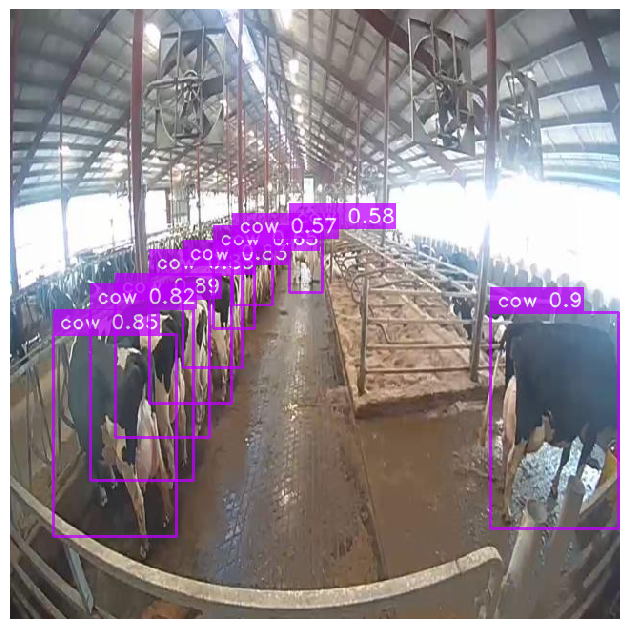

In [60]:
img_url = "/Users/mautushid/github/Yolo_Nas/cow_test.v1i.yolov5pytorch/test/images/img_1_jpg.rf.f874b8a814a980341ea520c40df12def.jpg"
#img_url = 'https://www.mynumi.net/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/s/e/serietta_usa_2_1/www.mynumi.net-USASE5AD160-31.jpg'
best_model.predict(img_url,conf = 0.55).show()